In [27]:

library(tidyr)
library(tidyverse)
require(mice)
require(lattice)

In [28]:
path = "../input/blindflight/Muestras - BlindFlight.csv"
columns = c("N", "isBinaural", "result", "flow")
data = read.csv(path, header = T, sep=";", col.names = columns)

In [29]:
head(data)

,N,isBinaural,result,flow
,<int>,<int>,<int>,<dbl>
1,1,0,19,29.00
2,2,1,22,27.50
3,3,0,24,32.00
4,4,1,26,35.25
5,5,0,22,23.50
6,6,1,20,29.75


In [30]:
tail(data)

,N,isBinaural,result,flow
,<int>,<int>,<int>,<dbl>
31,31,0,12,30.25
32,32,1,21,36.75
33,33,0,18,32.00
34,34,1,14,33.00
35,35,0,17,30.75
36,36,1,18,24.00


In [31]:
summary(data)

       N           isBinaural      result           flow      
 Min.   : 1.00   Min.   :0.0   Min.   :12.00   Min.   : 9.00  
 1st Qu.: 9.75   1st Qu.:0.0   1st Qu.:19.75   1st Qu.:19.38  
 Median :18.50   Median :0.5   Median :22.50   Median :24.62  
 Mean   :18.50   Mean   :0.5   Mean   :21.81   Mean   :24.47  
 3rd Qu.:27.25   3rd Qu.:1.0   3rd Qu.:24.00   3rd Qu.:30.81  
 Max.   :36.00   Max.   :1.0   Max.   :28.00   Max.   :36.75  

In [32]:
str(data)

'data.frame':	36 obs. of  4 variables:
 $ N         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ isBinaural: int  0 1 0 1 0 1 0 1 0 1 ...
 $ result    : int  19 22 24 26 22 20 18 26 27 21 ...
 $ flow      : num  29 27.5 32 35.2 23.5 ...


In [36]:
dataBin = filter(data, isBinaural == 1)
dataSte = filter(data, isBinaural == 0)
head(dataBin)
head(dataSte)

,N,isBinaural,result,flow
,<int>,<int>,<int>,<dbl>
1,2,1,22,27.50
2,4,1,26,35.25
3,6,1,20,29.75
4,8,1,26,31.50
5,10,1,21,24.75
6,12,1,24,23.00


,N,isBinaural,result,flow
,<int>,<int>,<int>,<dbl>
1,1,0,19,29.00
2,3,0,24,32.00
3,5,0,22,23.50
4,7,0,18,30.75
5,9,0,27,22.75
6,11,0,22,31.00


In [37]:
summary(dataBin)

       N          isBinaural     result           flow      
 Min.   : 2.0   Min.   :1    Min.   :14.00   Min.   :11.75  
 1st Qu.:10.5   1st Qu.:1    1st Qu.:21.25   1st Qu.:23.12  
 Median :19.0   Median :1    Median :23.50   Median :25.38  
 Mean   :19.0   Mean   :1    Mean   :23.17   Mean   :25.57  
 3rd Qu.:27.5   3rd Qu.:1    3rd Qu.:26.00   3rd Qu.:31.06  
 Max.   :36.0   Max.   :1    Max.   :28.00   Max.   :36.75  

In [38]:
summary(dataSte)

       N          isBinaural     result           flow      
 Min.   : 1.0   Min.   :0    Min.   :12.00   Min.   : 9.00  
 1st Qu.: 9.5   1st Qu.:0    1st Qu.:18.00   1st Qu.:16.94  
 Median :18.0   Median :0    Median :22.00   Median :23.75  
 Mean   :18.0   Mean   :0    Mean   :20.44   Mean   :23.36  
 3rd Qu.:26.5   3rd Qu.:0    3rd Qu.:23.00   3rd Qu.:30.75  
 Max.   :35.0   Max.   :0    Max.   :27.00   Max.   :34.00  

In [39]:
resultBin <- dataBin$result
resultSte <- dataSte$result

In [40]:
head(resultBin)
head(resultSte)

[1] 22 26 20 26 21 24

[1] 19 24 22 18 27 22

## Se aplica test Shapiro-Wilk, para verificar normalidad
Se puede observar p-value no cumple la condición de normalidad, por ende no podemos utilizar T-Test

In [41]:
shapiro.test(resultBin)
shapiro.test(resultSte)


	Shapiro-Wilk normality test

data:  resultBin
W = 0.94081, p-value = 0.2992



	Shapiro-Wilk normality test

data:  resultSte
W = 0.92767, p-value = 0.1767


## Test Fligner-Killen
Dado que las distribuciones no se comportan de forma normal, se utilizará Wilcoxon, y para ello se debe cumplir la igualdad de varianza entre grupos (homocedasticidad). Y podemos notar que H0 del test Fligner-Killer no se puede rechazar, por ende las varianzas son iguales o bien no son significativamente diferentes.

In [42]:
fligner.test(x = list(resultBin,resultSte))


	Fligner-Killeen test of homogeneity of variances

data:  list(resultBin, resultSte)
Fligner-Killeen:med chi-squared = 0.12495, df = 1, p-value = 0.7237


## Test Mann–Whitney-Wilcoxon
Vemos que la hipótesis nula se rechaza, por lo tanto las medias de ambas muestras si difieren para un tipo de experiencia u otras (binaural y estereo)

In [43]:
wilcox.test(resultBin, resultSte)

Warning message in wilcox.test.default(resultBin, resultSte):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  resultBin and resultSte
W = 222, p-value = 0.05859
alternative hypothesis: true location shift is not equal to 0


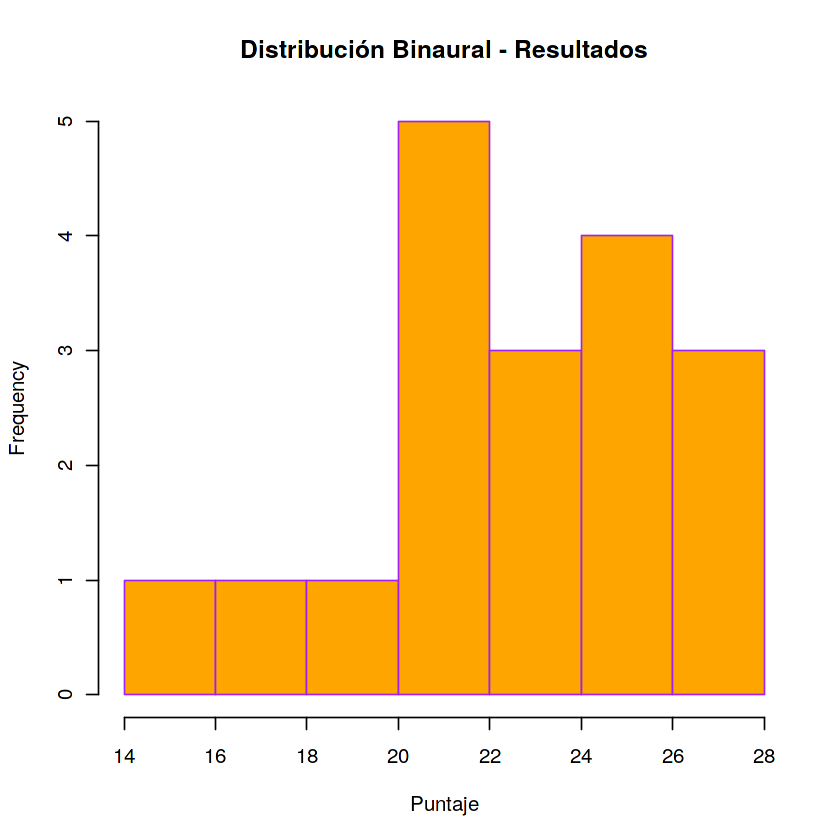

In [47]:
hist(resultBin, breaks=6, main = "Distribución Binaural - Resultados", 
     xlab = "Puntaje", border = "purple", 
     col = "orange",)

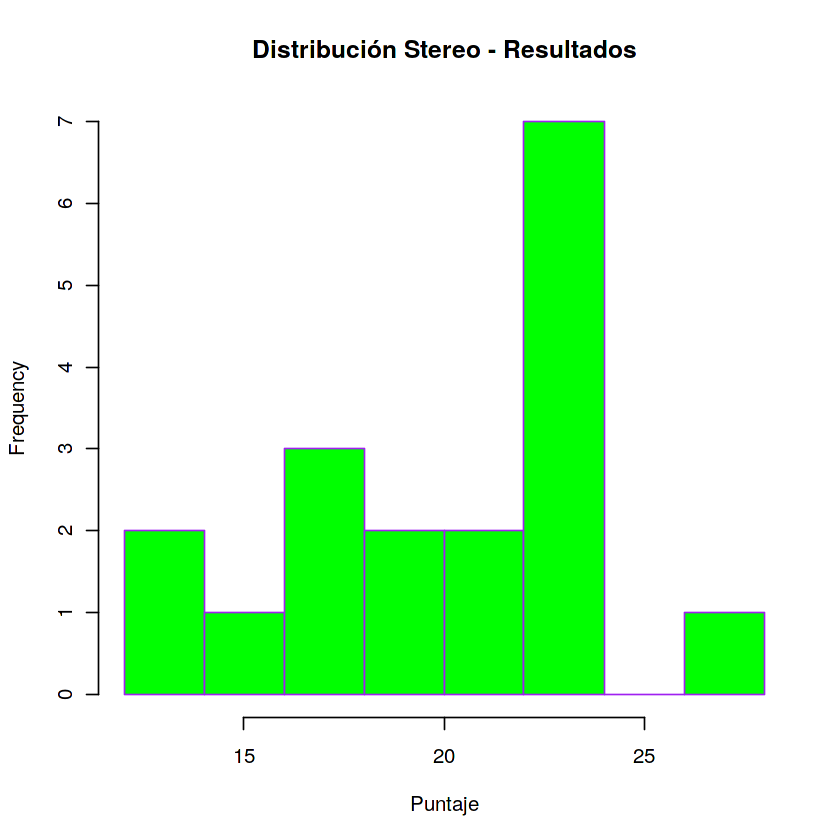

In [48]:
hist(resultSte, breaks=6, main = "Distribución Stereo - Resultados", 
     xlab = "Puntaje", border = "purple", 
     col = "green",)

In [49]:
flowBin <- dataBin$flow
flowSte <- dataSte$flow

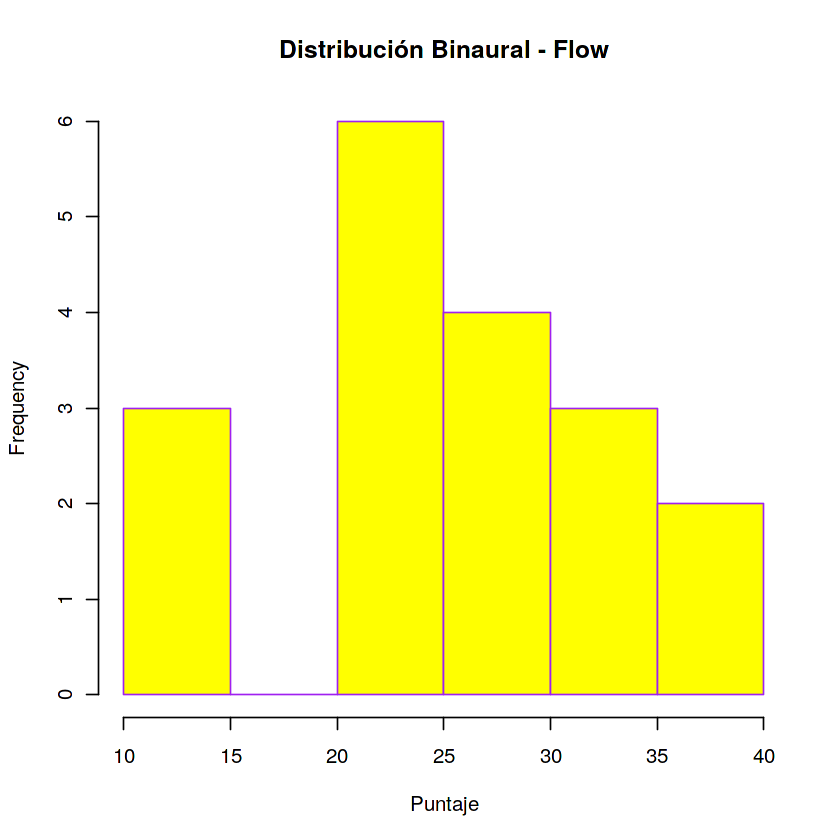

In [51]:
hist(flowBin, breaks=6, main = "Distribución Binaural - Flow", 
     xlab = "Puntaje", border = "purple", 
     col = "yellow")

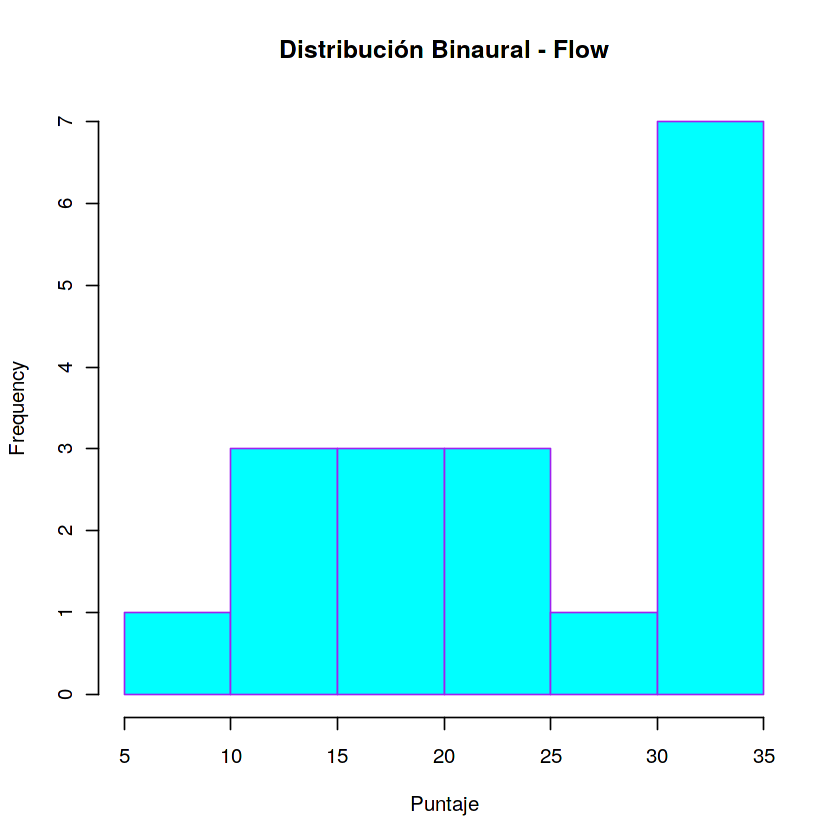

In [52]:
hist(flowSte, breaks=6, main = "Distribución Binaural - Flow", 
     xlab = "Puntaje", border = "purple", 
     col = "cyan")

In [53]:
shapiro.test(flowBin)
shapiro.test(flowSte)


	Shapiro-Wilk normality test

data:  flowBin
W = 0.94801, p-value = 0.3947



	Shapiro-Wilk normality test

data:  flowSte
W = 0.90007, p-value = 0.05763


In [54]:
fligner.test(x = list(flowBin,flowSte))


	Fligner-Killeen test of homogeneity of variances

data:  list(flowBin, flowSte)
Fligner-Killeen:med chi-squared = 0.89642, df = 1, p-value = 0.3437


In [55]:
wilcox.test(flowBin, flowSte)

Warning message in wilcox.test.default(flowBin, flowSte):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  flowBin and flowSte
W = 187.5, p-value = 0.4287
alternative hypothesis: true location shift is not equal to 0
